# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

### Student Information
Name: Sibongakonke Kwanele Zungu

Student ID:108065432

GitHub ID:Sibonele


## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [73]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [74]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [75]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [76]:
# shuffle dataset
#train_df = train_df.sample(frac=1)
#test_df = test_df.sample(frac=1)

In [77]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [78]:
import os
import io
import re
import csv
import math
import nltk
import heapq 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [79]:
from sys import path
from sklearn import datasets
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation, digits
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg as gt
from sklearn.metrics import recall_score
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from IPython.core.display import display, HTML
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [80]:
# Answer here

#lower string in data_file and passing into a new varialble
dataset_train=train_df['text'].str.lower()

# Preparing the text column in train dataset  for bag of words, a corpus is created first
corpus_train = []
for words in dataset_train:
     corpus_train.append(words)

vectorizer = CountVectorizer()
words_train=vectorizer.fit_transform(corpus_train).todense(10)
counted_words_train= vectorizer.vocabulary_
print(counted_words_train)


{'how': 4221, 'the': 8930, 'fu': 3506, 'who': 9808, 'heck': 4056, 'moved': 5888, 'my': 5957, 'fridge': 3474, 'should': 8069, 'knock': 4963, 'landlord': 5027, 'door': 2647, 'angry': 562, 'mad': 5405, 'so': 8264, 'indian': 4410, 'uber': 9333, 'driver': 2702, 'just': 4798, 'called': 1484, 'someone': 8303, 'word': 9900, 'if': 4319, 'wasn': 9682, 'in': 4383, 'moving': 5894, 'vehicle': 9513, 'have': 4009, 'jumped': 4785, 'out': 6517, 'disgusted': 2550, 'dpd_uk': 2664, 'asked': 725, 'for': 3391, 'parcel': 6603, 'to': 9119, 'be': 976, 'delivered': 2397, 'pick': 6777, 'up': 9443, 'store': 8525, 'not': 6235, 'address': 321, 'fuming': 3529, 'poorcustomerservice': 6916, 'ef': 2808, 'whichever': 9794, 'butt': 1450, 'wipe': 9860, 'pulled': 7148, 'fire': 3277, 'alarm': 435, 'davis': 2316, 'bc': 970, 'was': 9678, 'sound': 8335, 'asleep': 729, 'pissed': 6815, 'upset': 9449, 'tired': 9100, 'sad': 7744, 'hangry': 3960, 'don': 2630, 'join': 4731, 'btcare': 1390, 'they': 9000, 'put': 7186, 'phone': 6761, '

In [81]:
df_counted_train=pd.DataFrame.from_dict(counted_words_train, orient='index',
                       columns=['Word Occurance'])


In [82]:
train_order= sorted(df_counted_train['Word Occurance'].head(30).items(), key=lambda k_v: k_v[1], reverse=True)
print(train_order)
    


[('word', 9900), ('who', 9808), ('wasn', 9682), ('vehicle', 9513), ('uber', 9333), ('the', 8930), ('someone', 8303), ('so', 8264), ('should', 8069), ('out', 6517), ('my', 5957), ('moving', 5894), ('moved', 5888), ('mad', 5405), ('landlord', 5027), ('knock', 4963), ('just', 4798), ('jumped', 4785), ('indian', 4410), ('in', 4383), ('if', 4319), ('how', 4221), ('heck', 4056), ('have', 4009), ('fu', 3506), ('fridge', 3474), ('driver', 2702), ('door', 2647), ('called', 1484), ('angry', 562)]


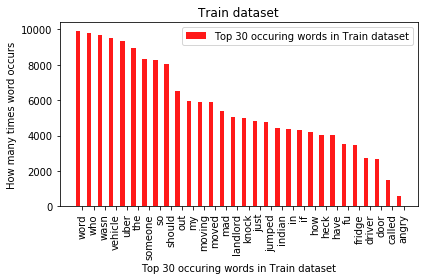

In [83]:
train_words = len(train_order)

vals_films = [x[1] for x in train_order]
legends_films = [x[0] for x in train_order]

fig, ax = plt.subplots()

index = np.arange(train_words)
bar_width = 0.40

opacity = 0.9

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Top 30 occuring words in Train dataset')


plt.xlabel('Top 30 occuring words in Train dataset')
plt.ylabel('How many times word occurs')
plt.title('Train dataset')
plt.xticks(index + bar_width, legends_films, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
#Test
#lower string in data_file and passing into a new varialble
dataset_test=test_df['text'].str.lower()

# Preparing the text column in train dataset  for bag of words, a corpus is created first
corpus_test = []
for words in dataset_test:
     corpus_test.append(words)

vectorizer = CountVectorizer()
words_test=vectorizer.fit_transform(corpus_test).todense(10)
counted_words_test= vectorizer.vocabulary_
print(counted_words_test)

{'zubairsabirpti': 1947, 'pls': 1334, 'dont': 502, 'insult': 887, 'the': 1687, 'word': 1901, 'molna': 1136, 'arcticfantasy': 132, 'would': 1912, 'have': 785, 'almost': 85, 'took': 1749, 'offense': 1244, 'to': 1739, 'this': 1712, 'if': 860, 'actually': 48, 'snapped': 1565, 'you': 1938, 'illinoisloyalty': 863, 'that': 1686, 'rutgers': 1464, 'game': 694, 'was': 1843, 'an': 97, 'abomination': 35, 'affront': 58, 'god': 725, 'and': 99, 'man': 1068, 'we': 1853, 'must': 1162, 'never': 1186, 'speak': 1595, 'of': 1240, 'it': 909, 'again': 62, 'cozangaming': 401, 'what': 1869, 'lisa': 1015, 'asked': 144, 'before': 195, 'she': 1527, 'started': 1617, 'raging': 1389, 'at': 150, 'me': 1088, 'can': 290, 'call': 282, 'heh': 799, 'sometimes': 1580, 'get': 705, 'mad': 1060, 'over': 1277, 'something': 1579, 'so': 1567, 'minuscule': 1122, 'try': 1774, 'ruin': 1460, 'somebodies': 1576, 'life': 1005, 'not': 1212, 'like': 1009, 'lose': 1041, 'your': 1940, 'job': 921, 'into': 892, 'federal': 616, 'prison': 136

In [85]:
df_counted_test=pd.DataFrame.from_dict(counted_words_test, orient='index',
                       columns=['Word Occurance'])

In [86]:
test_order= sorted(df_counted_test['Word Occurance'].head(30).items(), key=lambda k_v: k_v[1], reverse=True)
print(test_order)

[('zubairsabirpti', 1947), ('you', 1938), ('would', 1912), ('word', 1901), ('was', 1843), ('took', 1749), ('to', 1739), ('this', 1712), ('the', 1687), ('that', 1686), ('snapped', 1565), ('rutgers', 1464), ('pls', 1334), ('offense', 1244), ('molna', 1136), ('man', 1068), ('insult', 887), ('illinoisloyalty', 863), ('if', 860), ('have', 785), ('god', 725), ('game', 694), ('dont', 502), ('arcticfantasy', 132), ('and', 99), ('an', 97), ('almost', 85), ('affront', 58), ('actually', 48), ('abomination', 35)]


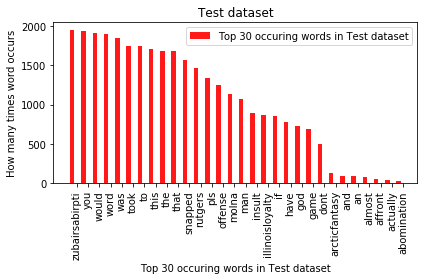

In [87]:
test_words = len(test_order)

vals_films = [x[1] for x in test_order]
legends_films = [x[0] for x in test_order]

fig, ax = plt.subplots()

index = np.arange(test_words)
bar_width = 0.40

opacity = 0.9

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Top 30 occuring words in Test dataset')


plt.xlabel('Top 30 occuring words in Test dataset')
plt.ylabel('How many times word occurs')
plt.title('Test dataset')
plt.xticks(index + bar_width, legends_films, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [88]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [89]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [90]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

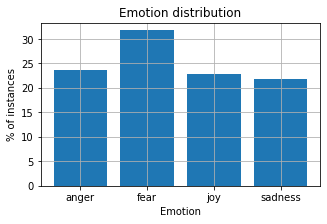

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [94]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])#learn vocabulary  details-tokenization happens here

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])# changing to matrices containing the amount of data available
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [95]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [96]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [97]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [99]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [100]:
"😂" in feature_names

False

In [101]:
"fear" in feature_names

True

In [102]:
"sibo" in feature_names

False

Let's try using another tokenizer below.

In [103]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [104]:
train_data_BOW_features_500.toarray()

array([[3, 4, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names() 
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [106]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [107]:
# Answer here 

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=1000,max_df=0.5,use_idf=True, norm='l2') 


In [108]:
vectorizer.fit(train_df['text'])

train_data_tfidf_features_1000 = vectorizer.transform(train_df['text'])

#checking dimension
train_data_tfidf_features_1000.shape

(3613, 1000)

In [109]:
#Extracting feature names 
feature_names_1000 = vectorizer.get_feature_names() 
feature_names_1000[100:110]

['blame',
 'blood',
 'blues',
 'boiling',
 'book',
 'both',
 'boy',
 'break',
 'breezy',
 'bright']

In [110]:
#Checking of feature name
"can" in feature_names_1000

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [112]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'fear', 'anger', 'fear', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [113]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [114]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [115]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [116]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

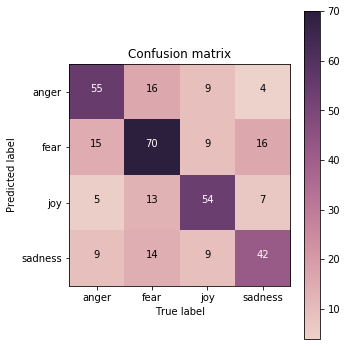

In [117]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

## Answer here

In the above confusion matrix, we have mostly True positives (TP) and False Positive (FP). Where TP is listed below and FP are the remaining values
True positives (TP)
Fear=70
Anger=55
Joy=54
Sadness=42

The diagonal values of the confusion matrix are quite high, thus this means that the predictions are more closer to accuracy.
As we can see above, fear is at 70, thus it is closets to accuracy. But with sadness, its not very high which then makes us to question the accurracyof the model.


True negatives(TN)
These are values we want to try to keep as low as possible. In the above matrix we have no zero value, but there are values close to 0 like having the predicted emotion to be anger yet the actual emotion is sadness, we have 4 as the value.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [118]:
# Answer here

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# seperate the independent and target variable on training data
train_x = BOW_500.transform(train_df['text'])
train_y= train_df['emotion']

# seperate the independent and target variable on testing data
test_x = BOW_500.transform(test_df['text'])
test_y = test_df['emotion']

model = MultinomialNB()
# fit the model with the training data
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train[0:10]) 

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test[0:10]) 


Target on train data ['anger' 'anger' 'anger' 'fear' 'anger' 'anger' 'anger' 'anger' 'anger'
 'anger']
Target on test data ['fear' 'anger' 'anger' 'anger' 'sadness' 'anger' 'anger' 'anger' 'anger'
 'anger']


In [119]:
# Accuray Score on train and test dataset
accuracy_train = accuracy_score(train_y,predict_train)
accuracy_test = accuracy_score(test_y,predict_test)

print('training accuracy: {}'.format(round(accuracy_train, 2)))
print('testing accuracy: {}'.format(round(accuracy_test, 2)))


training accuracy: 0.79
testing accuracy: 0.72


In [120]:
# precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(test_y, predict_test))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [121]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

values = confusion_matrix(test_y, predict_test) 
print(values)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


In [122]:
def plot_confusion_matrix(values, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(values, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(values.shape[1]),
           yticks=np.arange(values.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = values.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(values[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

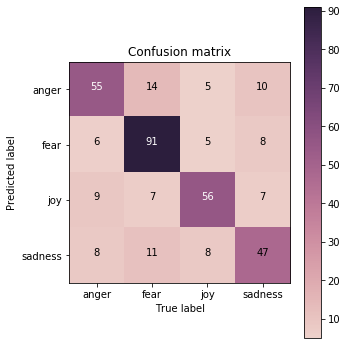

In [123]:
#confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(values, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here

The diagonal values of the confusion matrix are quite high, this means that the predictions are more closer to accuracy.
As we can see above, fear is at 91, thus it is closests to accuracy. Diagonals with Naive Bayes is much higher, thus having the model being more accurate
Since the Naive Bayes classifier returns probabilities, it is simpler to apply these results to a wide variety of tasks than if an arbitrary scale was used. With decision trees there is prunning involved and this may remove important data which does not occur much, thus decreasing the accuracy of the model. Decision trees are easy to use for small amounts of classes.


### 6.1 Prepare data (X, y)

In [124]:
import tensorflow.keras.backend as K
import keras


# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])#Decision trees are easy to use for small amounts of classes.
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [125]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [126]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train) # emotional labeels
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)



check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [127]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from sklearn.metrics import accuracy_score

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer, you can add more layers
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer, keep learning to find the best representation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_3 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_2 (Softmax)          (None, 4)                 0         
Total para

### 6.4 Train

In [128]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25 #how many times you want the model to be trained. Through every epochs we should learn something
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test)) # very import, test features and test labels
print('training finish')




Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 2s 497us/step - loss: 1.3325 - acc: 0.3598 - val_loss: 1.2860 - val_acc: 0.4121
Epoch 2/25
3613/3613 [==============================] - 1s 144us/step - loss: 1.0104 - acc: 0.6355 - val_loss: 0.9114 - val_acc: 0.6801
Epoch 3/25
3613/3613 [==============================] - 1s 140us/step - loss: 0.5874 - acc: 0.7980 - val_loss: 0.7647 - val_acc: 0.7262
Epoch 4/25
3613/3613 [==============================] - 1s 143us/step - loss: 0.4159 - acc: 0.8486 - val_loss: 0.7648 - val_acc: 0.6974
Epoch 5/25
3613/3613 [==============================] - 0s 138us/step - loss: 0.3397 - acc: 0.8746 - val_loss: 0.7790 - val_acc: 0.7032
Epoch 6/25
3613/3613 [==============================] - 1s 141us/step - loss: 0.2820 - acc: 0.8984 - val_loss: 0.8627 - val_acc: 0.6916
Epoch 7/25
3613/3613 [==============================] - 0s 136us/step - loss: 0.2381 - acc: 0.9156 - val_loss: 0.9309 - val_acc: 0.6916
E

#Train on 3613 samples, test on 347 samples
#explain why it drops when testing, reaches a performance platours, thus it moves from 70% all the way down.

### 6.5 Predict on testing data

#no need for the Y, PROVIDE ONLY THE features, in this case our features are condained in X

In [129]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.9842405e-03, 3.1473783e-03, 9.8331213e-01, 1.1556182e-02],
       [9.8993391e-01, 2.6476861e-03, 1.4030014e-06, 7.4169743e-03],
       [9.9785906e-01, 1.3604884e-03, 6.7375633e-11, 7.8044354e-04],
       [6.9796419e-01, 4.2886854e-06, 6.5774834e-03, 2.9545403e-01],
       [5.3211709e-04, 7.1455234e-01, 1.0787227e-02, 2.7412829e-01]],
      dtype=float32)

In [130]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'anger', 'anger', 'fear'], dtype=object)

Validation set and testing set can be similar

In [131]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


Watch accuracy and loss those will be of great use. use these two to answer the question 6

In [132]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,acc,loss,val_acc,val_loss
0,0,0.359812,1.332520,0.412104,1.285997
1,1,0.635483,1.010354,0.680115,0.911424
2,2,0.797952,0.587357,0.726225,0.764747
3,3,0.848602,0.415864,0.697406,0.764778
4,4,0.874619,0.339699,0.703170,0.778970
5,5,0.898422,0.282048,0.691643,0.862708
6,6,0.915583,0.238125,0.691643,0.930898
7,7,0.932189,0.200725,0.691643,0.968274
8,8,0.944091,0.174461,0.694524,0.998251
9,9,0.954885,0.146771,0.677233,1.070043


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

Train on 3613 samples, validate on 347 samples
Epoch 1/15
3613/3613 [==============================] - 0s 119us/step - loss: 0.0643 - acc: 0.9762 - val_loss: 1.6185 - val_acc: 0.6772
Epoch 2/15
3613/3613 [==============================] - 1s 142us/step - loss: 0.0627 - acc: 0.9779 - val_loss: 1.6345 - val_acc: 0.6744
Epoch 3/15
3613/3613 [==============================] - 0s 138us/step - loss: 0.0561 - acc: 0.9787 - val_loss: 1.6835 - val_acc: 0.6657
Epoch 4/15
3613/3613 [==============================] - 0s 138us/step - loss: 0.0596 - acc: 0.9768 - val_loss: 1.7346 - val_acc: 0.6686
Epoch 5/15
3613/3613 [==============================] - 1s 140us/step - loss: 0.0602 - acc: 0.9754 - val_loss: 1.6892 - val_acc: 0.6801
Epoch 6/15
3613/3613 [==============================] - 1s 142us/step - loss: 0.0564 - acc: 0.9781 - val_loss: 1.7713 - val_acc: 0.6628
Epoch 7/15
3613/3613 [==============================] - 0s 138us/step - loss: 0.0580 - acc: 0.9781 - val_loss: 1.7498 - val_acc: 0.6657
E

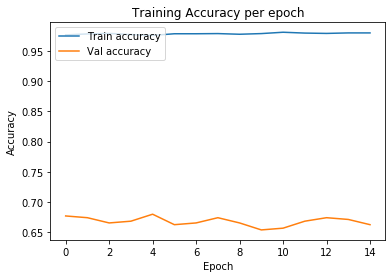

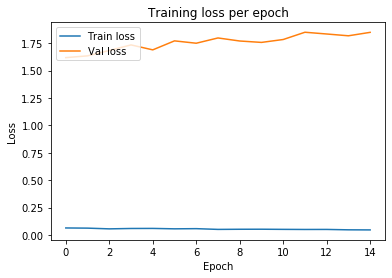

In [133]:
# Answer here
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=15, batch_size=32, verbose=1,  validation_data = (X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

### 7.3 Generating word vector (embeddings)

In [134]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')# to make sure it was loaded correctly.

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [135]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164639472961)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here

The words that are similar will have similar vector, but of what is important is the frequency of the words as same woords can be used but the have different mesnings in different sentences. Thus this creates mapping of target words to their context words, making it easier for model training. The model becomes faster as the words are not compared based on string but are compared or analysed using the vector. This would help in tasks such as text classification and sentiment analysis tasks. 



---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [136]:
# Answer here

word_list= ["angry", "happy", "sad", "fear"]
topn = 15

angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        


print('angry_words: ', angry_words, "  ")
print('happy_words: ', happy_words, "  ")
print('sad_words: ', sad_words, "  ")
print('fear_words: ', fear_words, "  ")

target_words = angry_words+ happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']   
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']   
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']   
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']   

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'ir

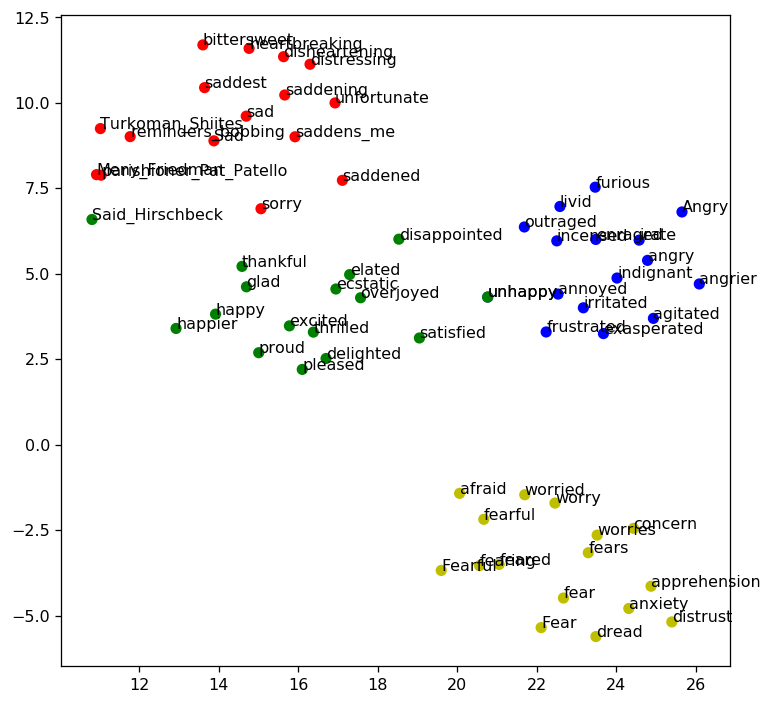

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words) #amout of words you want to see
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---